# Hierarchical Clustering

El clustering jerárquico es un método de aprendizaje automático no supervisado que se utiliza para agrupar datos en función de su similitud. El algoritmo funciona creando una jerarquía de grupos, comenzando con cada punto de datos como su propio grupo y luego combinando los grupos más similares hasta que solo queda un grupo.

Cada data point o punto de dato ubicado en un espacio vectorial evalúa su propia distancia con respecto a otros puntos, y a partir de allí este algoritmo escoge la distancia más corta y define un clúster. Este paso se repite de forma iterativa con todos los data points. Posteriormente, se evalúa la distancia entre clústers, y escoge la distancia más cercana entre todos los clústers. Y así sucesivamente, hasta generar un solo clúster que lo abarca todo. Y a esto se le conoce como clústers jerárquicos.

Existen dos tipos de clusterización jerárquica:
* Aglomerativo: Este enfoque comienza con cada punto de datos como su propio grupo y luego combina los grupos más similares hasta que solo queda un grupo. El algoritmo puede usar una variedad de medidas de similitud para determinar qué grupos combinar.
* Divisivo: Este enfoque comienza con todos los datos en un solo grupo y luego divide el grupo en dos grupos más pequeños, repitiendo el proceso hasta que cada punto de datos esté en su propio grupo. El algoritmo puede usar una variedad de medidas de distancia para determinar cómo dividir los grupos.

## Ventajas

* No se necesita el número de clústers
* Es simple.
* Resultados interpretables
* Única ejecución
* Ayuda visual del dendrodrama

## Desventajas

* Tarda en datasets de gran tamaño.
* No presenta un objetivo matemático.
* Los outliers afectan drásticamente.
* Mayor necesidad de poder de cómputo.

## ¿Cuándo utilizar este algoritmo?

* Necesito comprender los resultados de una manera visual.
* Tengo un dataset pequeño.
* Desconozco la cantidad de clústers por completo.
* Resultados rápidos.

## Implementación con algoritmo aglomerativo

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
# Requiere instalación "pip install yellowbrick"
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

### Preparando nuestro set de datos

In [3]:
x, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [4]:
df_blobs = pd.DataFrame({
    'x1' : x[:,0],
    'x2' : x[:,1],
    'y' : y
})

In [5]:
df_centers = pd.DataFrame({
    'x1' : c[:,0],
    'x2' : c[:,1]
})

### Visualización de datos

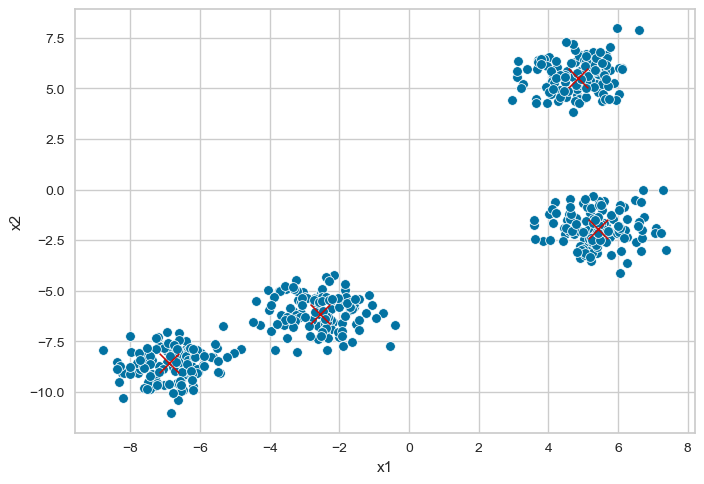

In [6]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='x', s=200, c='r')
plt.show()

### Dendrograma

Text(0, 0.5, 'Distancia Euclidiana')

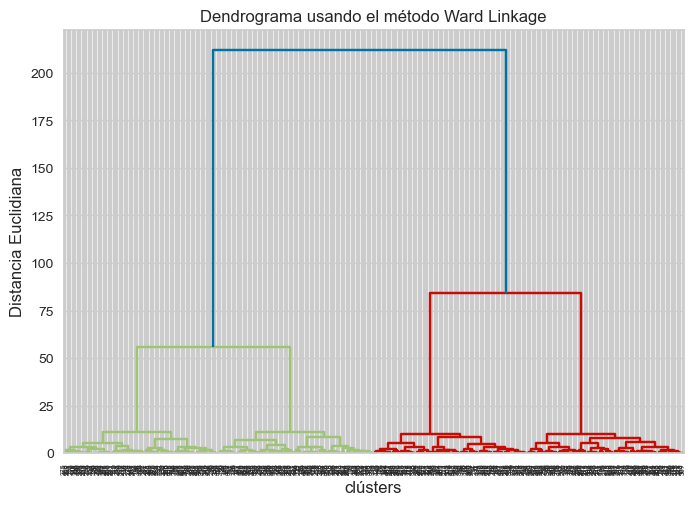

In [7]:
dendrograma_plot = dendrogram(linkage(x, method='ward'))
plt.title('Dendrograma usando el método Ward Linkage')
plt.xlabel('clústers', fontsize=12)
plt.ylabel('Distancia Euclidiana', fontsize=12)

### Aplicar Clúster Jerárquico Aglomerativo

In [13]:
def visualizar_cluster(n):
    hc = AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage='ward')
    y_hc = hc.fit_predict(x)

    df_blobs['cluster'] = y_hc

    sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
    plt.show()

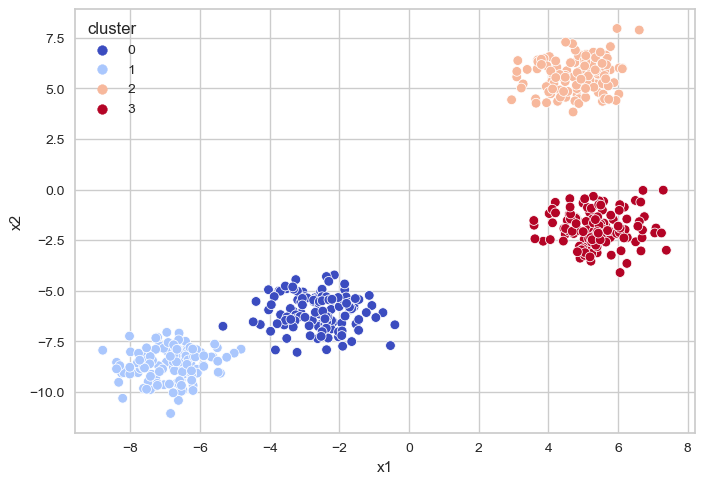

In [14]:
visualizar_cluster(4)

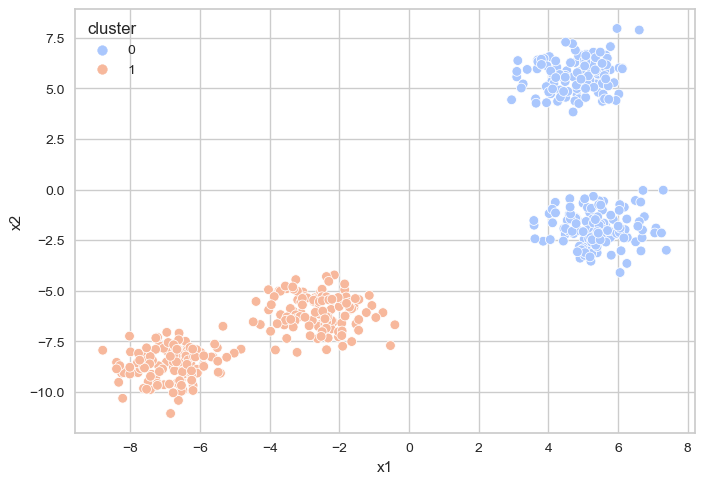

In [15]:
visualizar_cluster(2)

### Evaluando los resultados obtenidos

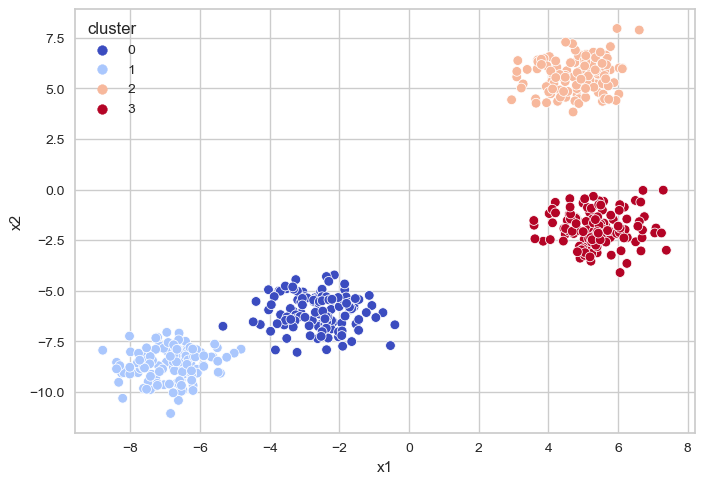

In [17]:
visualizar_cluster(4)

For n_clusters = 4 The average silhouette_score is : 0.759334352722076


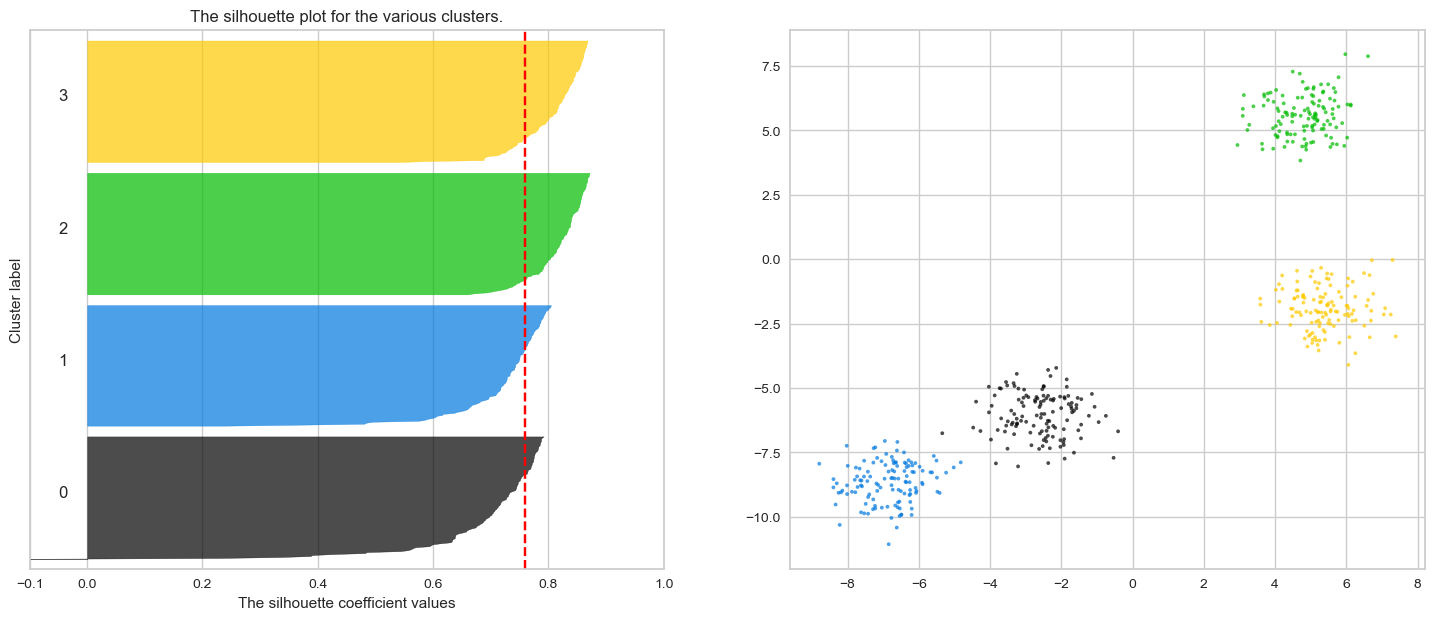

In [22]:
range_n_clusters = [4,2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

plt.show()